# CS105 Final Project
Group Members: August Bennett, Jalen Shen, Johnny To, Justin Ly
## Dataset
https://www.icpsr.umich.edu/web/NACJD/studies/27521

NOTE: Dataset is VERY Large (~3000) variables.
### Initial Features
These were the features selected to be possibly useful for us to make our classification model.
| Variable Name 	| Description                                       	|
|---------------	|---------------------------------------------------	|
| NODR30A       	| USUAL # OF DRINKS PER DAY PAST 30 DAYS            	|
| RK5ALWK       	| RISK HAVING 5 OR MORE DRINKS ONCE OR TWICE A WEEK 	|
| GRSKD4_5      	| GREAT RISK: HAVE 4-5 ALC DRINKS PER DAY           	|
| ALCPHCTD      	| CONTD TO DRINK ALC DESPITE PHYS PRBS              	|
| ALCEMCTD      	| CONTD TO DRINK ALC DESPITE EMOT PRBS              	|
| ALCFMCTD      	| CONTD TO DRINK ALC DESPITE PRBS W/ FAM/FRNDS      	|
| TXYRINAD      	| RES ALC/DRG REH TRMT FOR ALC, DRUGS, OR BOTH      	|
| TXILALEV      	| RECEIVED TREATMENT FOR DRG OR ALC USE IN LIFETIME 	|
| GENDER_R      	|  MALE (& FEMALE)                                  	|
| AGE_YRS       	| AGE IN YEARS RECODE                               	|
| ALCTRY        	| AGE WHEN FIRST DRANK ALCOHOLIC BEVERAGE           	|
| ALCREC        	| TIME SINCE LAST DRANK ALCOHOLIC BEVERAGE          	|
| ALCYRTOT      	| TOTAL # OF DAYS USED ALCOHOL IN PAST 12 MOS       	|
| IRALCFY       	| ALCOHOL FREQUENCY PAST YEAR - IMPUTATION REVISED  	|
| TOTDRINK      	| TOTAL # OF DAYS USED ALCOHOL IN PAST 12 MOS       	|
| TXEVER        	| EVER RECEIVED ALCOHOL OR DRUG TREATMENT           	|
| ALLARRST      	| ANY ARREST                                        	|
| ALCYDAYS      	| # OF DAYS USED ALCOHOL IN PAST YEAR               	|

After researching and using the user guide that was given to us via the study we revised our features. The main reason was some features that we selected were missing a large amount of responses. (some participants may have decided to skip the question). Below is the revised feature list.
| Variable Name 	| Description                                       	|
|---------------	|---------------------------------------------------	|
| NODR30A       	| USUAL # OF DRINKS PER DAY PAST 30 DAYS            	|
| ALCTRY        	| AGE WHEN FIRST DRANK ALCOHOLIC BEVERAGE           	|
| ALCREC        	| TIME SINCE LAST DRANK ALCOHOLIC BEVERAGE          	|
| IRALCFY       	| ALCOHOL FREQUENCY PAST YEAR - IMPUTATION REVISED  	|
| TOTDRINK      	| TOTAL # OF DAYS USED ALCOHOL IN PAST 12 MOS       	|
| ALCYDAYS      	| # OF DAYS USED ALCOHOL IN PAST YEAR               	|
| IRSEX          	| GENDER                                            	|
| AGE_YRS       	| AGE IN YEARS RECODE                               	|
| BOOKED      	    | EVER ARRESTED AND BOOKED FOR BREAKING THE LAW         |

These new variables were cleaned and made into a new file called cs105_dataset.csv



## Contributions
| Teammate 	        | What they did in the project                          |
|---------------	|---------------------------------------------------	|
| August Bennett    | K-Means Clustering             	|
| Jalen Shen        | Naive Bayes Analysis           	|
| Johnny To        	| Data selection and cleaning, model selection          	|
| Justin Ly       	| Exploratory Data Analysis  	|

## EDA

In [1]:
%pip install seaborn

<AxesSubplot:title={'center':'Respondant Distribution by Age'}, xlabel='AGE_YRS'>

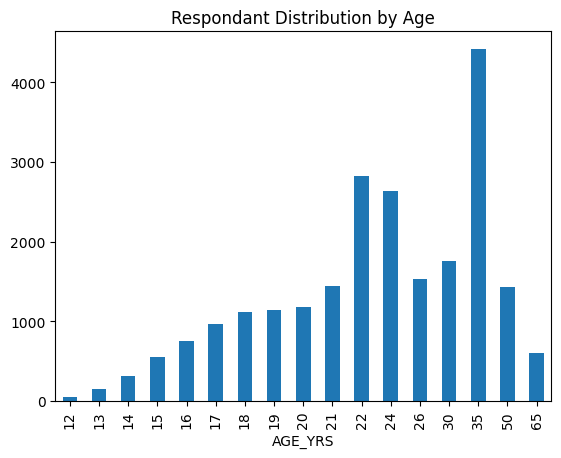

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv("cs105_dataset.csv")

by_age = df.groupby('AGE_YRS')['AGE_YRS'].count()
by_age.plot(kind='bar', title='Respondant Distribution by Age')

Here we see a bimodal age distribution among respondants, with one peak in the early twenties and another at 35. Note the sudden jump in respondant age from 30 to 35, 35 to 50, and 50 to 65. This could be due to several factors. It's possible that the surveyors more heavily targeted certain age groups. Alteratively, older respondants may have elected to give a rougher estimation of their age or omit their responses.

<AxesSubplot:title={'center':'Respondant Breakdown by Gender'}>

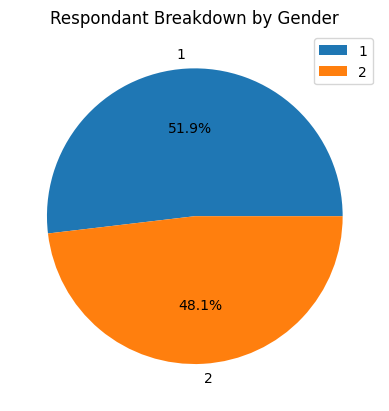

In [3]:
df.groupby('IRSEX').size().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Respondant Breakdown by Gender')

The data represents both male (1) and female (2) respondants. There is a slight bias of 1.9 percentage points in favor of male respondants, but not significantly so.

<AxesSubplot:title={'center':'Average Number of Drinks Per Day Over Previous Month, by Gender'}, xlabel='IRSEX'>

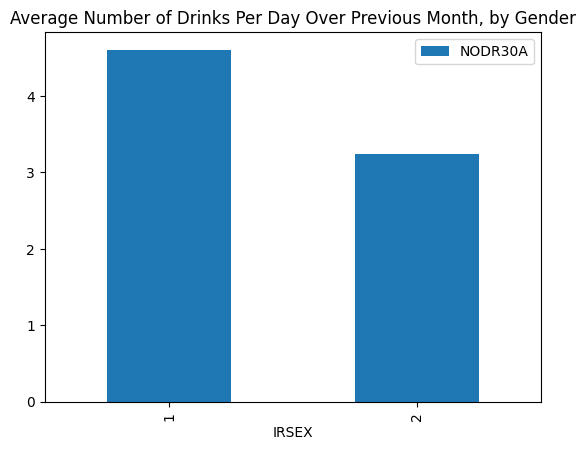

In [4]:
pt_dpd_gdr = pd.pivot_table(data=df, values='NODR30A', index='IRSEX', aggfunc='mean')
pt_dpd_gdr.loc[[1,2]].plot(kind='bar', title='Average Number of Drinks Per Day Over Previous Month, by Gender')

Here we see that men, on average, estimate drinking 4-5 drinks per day while women average somewhat lower at just over 3. As an aside, we observed a handful of outlier responses that may be due to a misinterpretation of the question. Certain respondants gave answers in the range of 20 to 30 drinks daily. A reasonable explanation to this could be that the question was interpreted such that some respondants estimated the total number of drinks consumed within the past thirty days.

<AxesSubplot:title={'center':'Count of Respondants Arrested and Booked, by Gender'}, xlabel='IRSEX'>

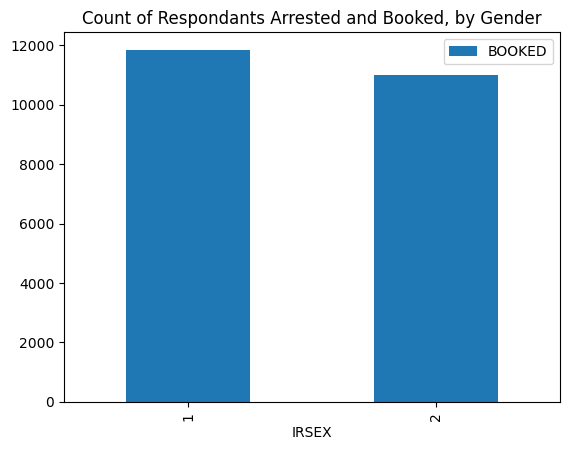

In [5]:
pt_booked_gdr = pd.pivot_table(data=df, values='BOOKED', index='IRSEX', aggfunc='count')
pt_booked_gdr.loc[[1,2]].plot(kind='bar', title='Count of Respondants Arrested and Booked, by Gender')

Broken down by gender, the count of male respondants arrested for any crime is slightly higher than among female respondants. This is consistent to the above findings that there was a slight male bias among responses, implying that respondant gender does not have a strong bearing on their arrest record. 

<AxesSubplot:title={'center':'Count of Respondents Arrested and Booked by Age'}, xlabel='AGE_YRS'>

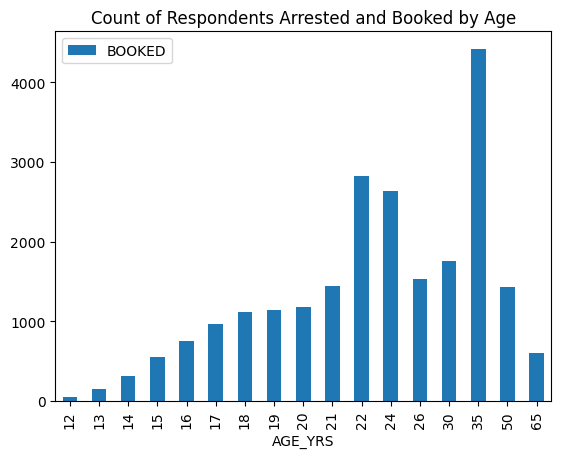

In [6]:
pt_booked_age = pd.pivot_table(data=df, values='BOOKED', index='AGE_YRS', aggfunc='count')
pt_booked_age.plot(kind='bar', title='Count of Respondents Arrested and Booked by Age')

The bar graph above represents the count of respondents arrested and booked by age which presents an intriguing pattern where arrest rates initially spike at age 22, indicating a peak in behavior leading to arrest among young adults. Contrary to the expected decline with age, there is a notable second peak at age 35, where arrest rates soar to an all-time high. This unexpected increase could suggest a cohort effect, where specific generational experiences or life stressors around mid-life contribute to a higher incidence of arrestable offenses. It might also reflect socio-economic pressures or career and family stresses that are prevalent in this age group.

<AxesSubplot:title={'center':'Alcohol Frequency in the Past Year by Age'}, xlabel='AGE_YRS'>

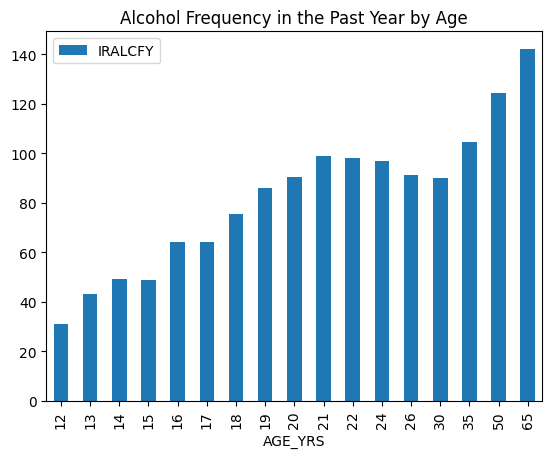

In [7]:
pt_alcohol_frequency_age = pd.pivot_table(data=df, values='IRALCFY', index='AGE_YRS', aggfunc='mean')
pt_alcohol_frequency_age.plot(kind='bar', title='Alcohol Frequency in the Past Year by Age')

The second graph portrays a gradual increase in alcohol consumption frequency from adolescence to the age of 65. Considering the graph above this one, there may be a correlation between alcohol frequency in the past year and the amount of booked and arrested indiviuals. As seen at the age of 50-65 there is a decline in the amount of booked inidivuals. The correlation although little does not seem to be enough to show that alchol frequency in the past year has anything to do with arrested and booked indiviuals.

## Data Cleaning/Analysis + Feature Generation
The data above has already been cleaned of study values that represented missing or blank values. We also removed rows that declared themselves as non drinkers.(This report assumes that they already drink). We are going to analyze the data again to further check for any missing values. If their is any we will generate the example.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   NODR30A   22853 non-null  int64
 1   ALCTRY    22853 non-null  int64
 2   ALCREC    22853 non-null  int64
 3   IRALCFY   22853 non-null  int64
 4   ALCYDAYS  22853 non-null  int64
 5   TOTDRINK  22853 non-null  int64
 6   IRSEX     22853 non-null  int64
 7   AGE_YRS   22853 non-null  int64
 8   BOOKED    22853 non-null  int64
dtypes: int64(9)
memory usage: 1.6 MB


looking at the data that we have, all of the features are numerical. This is not correct since BOOKED column is just a boolean. We will correct these errors now

In [9]:
df['BOOKED'] = df['BOOKED'].map({1: 'YES', 2: 'NO'}).astype('category')
df.head()

,NODR30A,ALCTRY,ALCREC,IRALCFY,ALCYDAYS,TOTDRINK,IRSEX,AGE_YRS,BOOKED
0,6,13,1,156,4,156,1,22,NO
1,3,13,1,24,2,24,1,20,NO
2,10,12,1,156,4,156,1,21,YES
3,2,15,1,120,4,120,1,65,NO
4,2,18,1,20,2,20,2,35,NO


Next, we'll check if there are any missing values. And from below we see that they all don't have missing values

In [10]:
df.isnull().sum()

NODR30A     0
ALCTRY      0
ALCREC      0
IRALCFY     0
ALCYDAYS    0
TOTDRINK    0
IRSEX       0
AGE_YRS     0
BOOKED      0
dtype: int64

## Machine Learning
### Techniques 
#### Naive Bayes
We are going to use Naive Bayes to classify the data we have.

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NODR30A   22853 non-null  int64   
 1   ALCTRY    22853 non-null  int64   
 2   ALCREC    22853 non-null  int64   
 3   IRALCFY   22853 non-null  int64   
 4   ALCYDAYS  22853 non-null  int64   
 5   TOTDRINK  22853 non-null  int64   
 6   IRSEX     22853 non-null  int64   
 7   AGE_YRS   22853 non-null  int64   
 8   BOOKED    22853 non-null  category
dtypes: category(1), int64(8)
memory usage: 1.4 MB


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

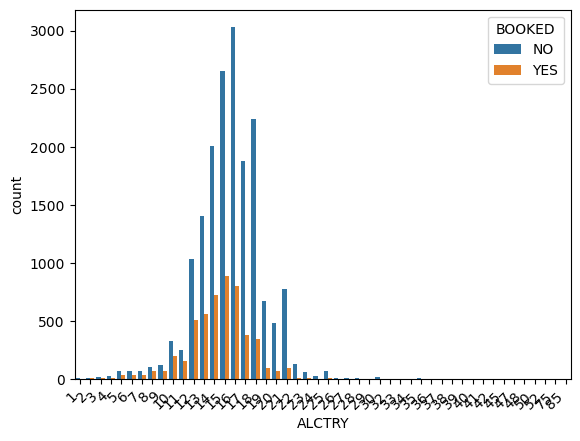

In [12]:
sns.countplot(data=df, x = 'ALCTRY', hue = 'BOOKED')
plt.xticks(rotation = 45, ha = 'right')

In [13]:
pre_df = pd.get_dummies(df, columns=['BOOKED'], drop_first = True)
pre_df.head()

,NODR30A,ALCTRY,ALCREC,IRALCFY,ALCYDAYS,TOTDRINK,IRSEX,AGE_YRS,BOOKED_YES
0,6,13,1,156,4,156,1,22,0
1,3,13,1,24,2,24,1,20,0
2,10,12,1,156,4,156,1,21,1
3,2,15,1,120,4,120,1,65,0
4,2,18,1,20,2,20,2,35,0


In [14]:
from sklearn.model_selection import train_test_split
X = pre_df.drop('BOOKED_YES', axis = 1)
Y = pre_df['BOOKED_YES']

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state = 125)


In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train);


In [16]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, Y_test)
f1 = f1_score(y_pred, Y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.749005568814638
F1 Score: 0.7651088382047828


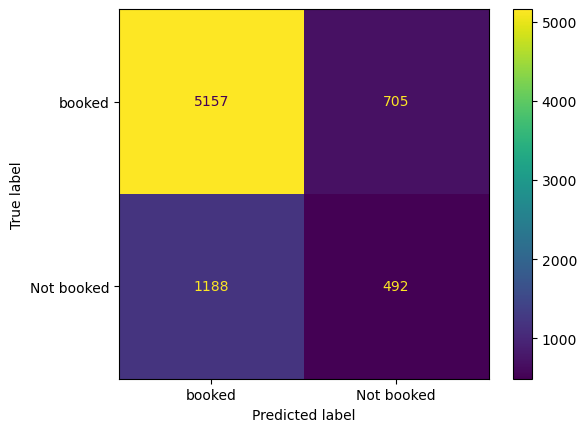

In [17]:
labels = ["booked", "Not booked"]
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

the naive bayes we developed for all the variables has an accuracy of .749 and more importantly a f1 score of .76. This means we can fairly accurately anticipate whether or not a person will be arrested, 
given the variables we have. However, what would happen if we looked at individual variables and their effects on the data?

In [19]:
df2 = pre_df[['BOOKED_YES', 'ALCTRY' ,'ALCYDAYS']].copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   BOOKED_YES  22853 non-null  uint8
 1   ALCTRY      22853 non-null  int64
 2   ALCYDAYS    22853 non-null  int64
dtypes: int64(2), uint8(1)
memory usage: 379.5 KB


In [20]:
X = df2.drop('BOOKED_YES', axis = 1)
Y = df2['BOOKED_YES']

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state = 125)
model1 = GaussianNB()
model1.fit(X_train, Y_train);

In [21]:
Y_pred = model1.predict(X_test)

accuracy1 = accuracy_score(Y_pred, Y_test)
f1 = f1_score(Y_pred, Y_test, average="weighted")

print("Accuracy:", accuracy1)
print("F1 Score:", f1)

Accuracy: 0.7771148236542031
F1 Score: 0.8710188862459765


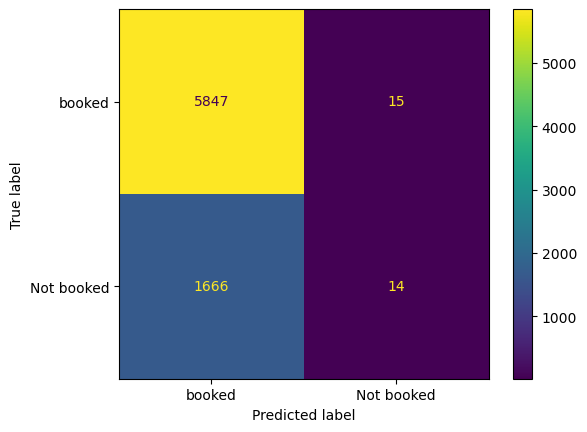

In [22]:
labels = ["booked", "Not booked"]
cm = confusion_matrix(Y_test, Y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp1.plot();

accuracy and f1 for this higher than incorporating every element, meaning that this model fairly accurate when looking at just ALCTRY and ALCYDAYS. Means these 2 variables likely very good at telling 
whether a person drank or not. will add more variables to this dataset until the accuract and f1 scores decrease. 

In [24]:
df3 = pre_df[['BOOKED_YES', 'ALCTRY' ,'ALCYDAYS', 'TOTDRINK' ]].copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   BOOKED_YES  22853 non-null  uint8
 1   ALCTRY      22853 non-null  int64
 2   ALCYDAYS    22853 non-null  int64
 3   TOTDRINK    22853 non-null  int64
dtypes: int64(3), uint8(1)
memory usage: 558.0 KB


In [25]:
a = df3.drop('BOOKED_YES', axis = 1)
b = df3['BOOKED_YES']

a_train, a_test, b_train, b_test = train_test_split( a, b, test_size=0.33, random_state = 125)

model3 = GaussianNB()
model3.fit(a_train, b_train);

b_pred = model3.predict(a_test)

accuracy2 = accuracy_score(b_pred, b_test)
f2 = f1_score(b_pred, b_test, average="weighted")

print("Accuracy:", accuracy2)
print("F1 Score:", f2)

Accuracy: 0.760408379740122
F1 Score: 0.8073943343047274


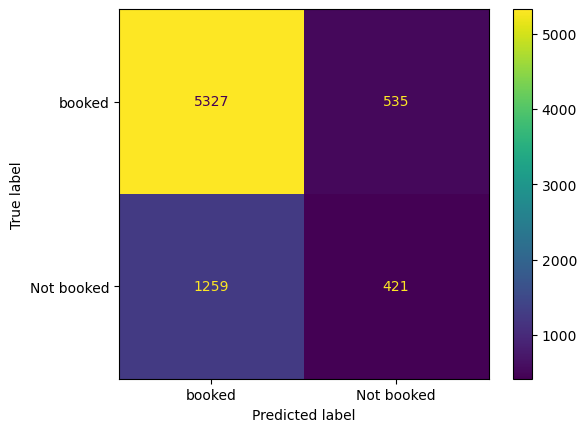

In [34]:
labels = ["booked", "Not booked"]
cm = confusion_matrix(b_test, b_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp1.plot();

decreased it, however lets compare with totdrink replaced with AGE_YRS to see if accuracy just decreases bc more data, or bc its bad for accuracy

In [27]:
df4 = pre_df[['BOOKED_YES', 'ALCTRY' ,'ALCYDAYS', 'AGE_YRS' ]].copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   BOOKED_YES  22853 non-null  uint8
 1   ALCTRY      22853 non-null  int64
 2   ALCYDAYS    22853 non-null  int64
 3   AGE_YRS     22853 non-null  int64
dtypes: int64(3), uint8(1)
memory usage: 558.0 KB


In [39]:
c = df4.drop('BOOKED_YES', axis = 1)
d = df4['BOOKED_YES']

c_train, c_test, d_train, d_test = train_test_split( c, d, test_size=0.33, random_state = 125)

model3 = GaussianNB()
model3.fit(c_train, d_train);

d_pred = model3.predict(c_test)

accuracy2 = accuracy_score(d_pred, d_test)
f2 = f1_score(d_pred, d_test, average="weighted")

print("Accuracy:", accuracy2)
print("F1 Score:", f2)

Accuracy: 0.7764518695306285
F1 Score: 0.8650989301728597


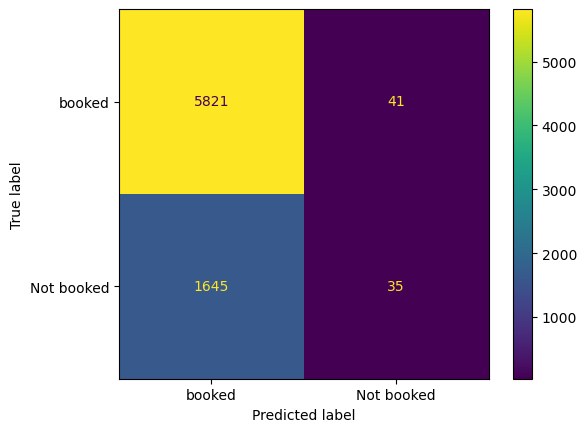

In [40]:
labels = ["booked", "Not booked"]
cm = confusion_matrix(d_test, d_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp1.plot();

it did increase f1 score by a significant amount, so totdrink does not help the model accurately predict whether a person has been arrested or not, meaning totdrink likely does not have a significant 
effect on ones likelihood of arrest. lets try removing totdrink from the main dataframe

In [30]:
df5 = pre_df[['BOOKED_YES', 'ALCTRY' ,'ALCYDAYS', 'AGE_YRS', 'ALCREC','IRALCFY', 'NODR30A', 'IRSEX']].copy()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22853 entries, 0 to 22852
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   BOOKED_YES  22853 non-null  uint8
 1   ALCTRY      22853 non-null  int64
 2   ALCYDAYS    22853 non-null  int64
 3   AGE_YRS     22853 non-null  int64
 4   ALCREC      22853 non-null  int64
 5   IRALCFY     22853 non-null  int64
 6   NODR30A     22853 non-null  int64
 7   IRSEX       22853 non-null  int64
dtypes: int64(7), uint8(1)
memory usage: 1.2 MB


In [41]:
e = df5.drop('BOOKED_YES', axis = 1)
f = df5['BOOKED_YES']

e_train, e_test, f_train, f_test = train_test_split( e, f, test_size=0.33, random_state = 125)

model4 = GaussianNB()
model4.fit(e_train, f_train);

f_pred = model4.predict(e_test)

accuracy4 = accuracy_score(f_pred, f_test)
f4 = f1_score(f_pred, f_test, average="weighted")

print("Accuracy:", accuracy4)
print("F1 Score:", f4)

Accuracy: 0.762132060461416
F1 Score: 0.787880862904052


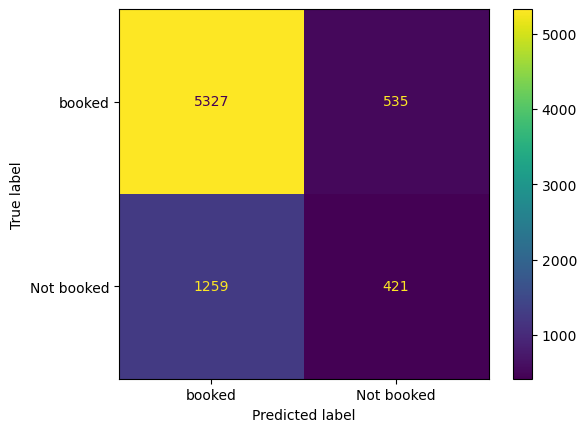

In [44]:
labels = ["booked", "Not booked"]
cm1 = confusion_matrix(f_test, f_pred)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=labels)
disp4.plot();

it does improve the accuracy and score by a minor amount, however with more other variables a minor increase is not insignificant. we can likely rule that totdrink does not actually have any significant 
effect on how likely one is to be arrested

#### K-Means Clustering

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Text(0.5, 1.0, 'PCA-flattened 8-dimensional K-Means Clustering applied on Listed Features')

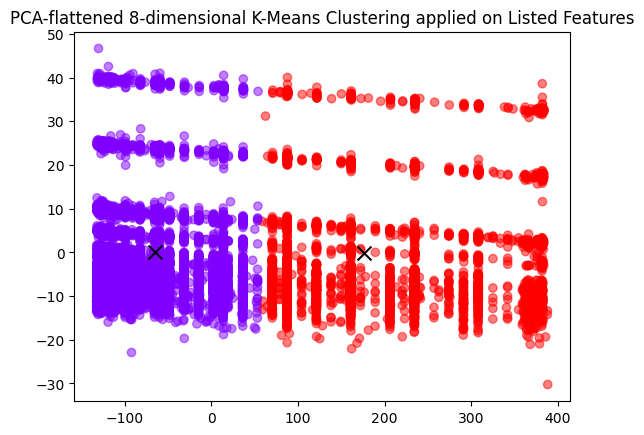

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

features = df.loc[:, 'NODR30A':'AGE_YRS']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

kmc = KMeans(n_clusters=2, random_state=42)

kmc.fit(X_pca)

centroids = kmc.cluster_centers_
labels = kmc.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='rainbow', alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100, c='black')
plt.title('PCA-flattened 8-dimensional K-Means Clustering applied on Listed Features')

Here, eight of our nine features were selected (all but BOOKED) and applied in K-means clustering with n=2 clusters, in an attempt to create a model of booked/unbooked respondants using our selected features. Since 8-dimensional data cannot be visualized in practice, the dimensionality of the set is reduced to a two-dimensional plot using Principal Component Analysis.